# Modelos de Regresion Lineal

## Modelo con datos simulados

**y = a + b * x**

* x : 100 valores distribuidos segun una N(1.5, 2.5)

* Ye = 8 + 1.8 + x + e

* **e** estara distribuida segun una N(0, 0.8

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 0.3 * x

In [5]:
y_act = 5 + 0.3 *x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y_act": y_act_list,
        "y_pred": y_pred_list
    
    }
)

In [8]:
data.head()

,x,y_act,y_pred
0,3.667981,4.547827,6.100394
1,-1.013710,4.706513,4.695887
2,5.256617,7.344791,6.576985
3,3.021627,6.410736,5.906488
4,0.312726,5.900236,5.093818


In [9]:
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

In [11]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Prediccion')

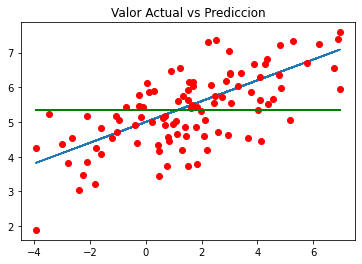

In [12]:
plt.plot(x,y_pred)
plt.plot(x,y_act, "ro")
plt.plot(x,y_mean, "g")
plt.title("Valor Actual vs Prediccion")

In [13]:
data["SSR"]=(data["y_pred"]-np.mean(y_act))**2
data["SSD"]=(data["y_pred"]-data["y_act"])**2
data["SST"]=(data["y_act"]-np.mean(y_act))**2

In [14]:
data.head()

,x,y_act,y_pred,SSR,SSD,SST
0,3.667981,4.547827,6.100394,0.591897,2.410465,0.613432
1,-1.013710,4.706513,4.695887,0.403427,0.000113,0.390042
2,5.256617,7.344791,6.576985,1.552364,0.589525,4.055166
3,3.021627,6.410736,5.906488,0.331133,0.254267,1.165731
4,0.312726,5.900236,5.093818,0.056277,0.650309,0.323976


In [15]:
SSR =sum(data["SSR"])
SSD =sum(data["SSD"])
SST =sum(data["SST"])

In [16]:
SSR

57.597647725281135

In [17]:
SSD

65.89291995949966

In [18]:
SST

116.29712310198741

In [19]:
SSR+SSD

123.4905676847808

In [20]:
R2 = SSR/SST

In [21]:
R2

0.4952628765783876

(array([ 2.,  5.,  9., 23., 17., 12., 14.,  6.,  7.,  5.]),
 array([-1.63439011, -1.27800538, -0.92162066, -0.56523593, -0.20885121,
         0.14753351,  0.50391824,  0.86030296,  1.21668769,  1.57307241,
         1.92945714]),
 <BarContainer object of 10 artists>)

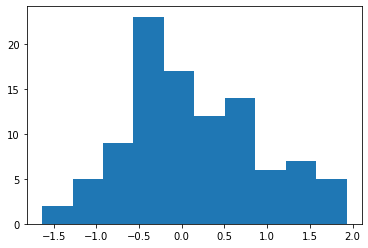

In [22]:
plt.hist(data['y_pred']-data["y_act"])

## Obteniendo la recta de regresion


* y = a + b ^ x
* b = sum((xi-x_m)^(y_1-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [23]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_act"])
x_mean,y_mean

(1.5461178141472454, 5.331046268127413)

In [24]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_act"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [25]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [26]:
alpha= y_mean - beta * x_mean

In [27]:
alpha,beta


(4.882441849696, 0.29014892288712124)

El modelo lineal obtenido por regresion es: 
     **(7.903538645710322, 1.8442729997031548)**

In [28]:
data["y_model"] = alpha + beta * data["x"]

In [29]:
data.head()

,x,y_act,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,3.667981,4.547827,6.100394,0.591897,2.410465,0.613432,-1.661884,4.502305,5.946703
1,-1.013710,4.706513,4.695887,0.403427,0.000113,0.390042,1.598699,6.552716,4.588315
2,5.256617,7.344791,6.576985,1.552364,0.589525,4.055166,7.471997,13.767805,6.407644
3,3.021627,6.410736,5.906488,0.331133,0.254267,1.165731,1.593092,2.177126,5.759164
4,0.312726,5.900236,5.093818,0.056277,0.650309,0.323976,-0.702033,1.521255,4.973179


In [30]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_act"])**2)
SST = sum((data["y_act"]-y_mean)**2)

In [31]:
SSR, SSD, SST

(52.22770116516439, 64.06942193682302, 116.29712310198741)

In [32]:
R2 = SSR / SST

In [33]:
R2

0.4490885051332097

Text(0.5, 1.0, 'Valor Actual vs Prediccion')

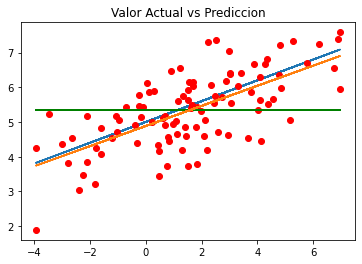

In [34]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_pred"])
plt.plot(data["x"],data["y_act"],"ro")
plt.plot(data["x"],y_mean,"g")
plt.plot(data["x"],data["y_model"])
plt.title("Valor Actual vs Prediccion")

## Error estandar de los residuos (RSE)

In [35]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.8085602090136732

In [36]:
np.mean(data["y_act"])

5.331046268127413

In [37]:
RSE / np.mean(data["y_act"])

0.15167007907018007

In [ ]:
# Incrementos del 15% de error